In [406]:
import pandas as pd
import numpy as np
import matplotlib as mp
import seaborn as sns



In [407]:
# Load the CSV file
df = pd.read_csv("C:\\Users\\sanyam mahajan\\Documents\\Mpr\\flipkart_headphones.csv")




In [408]:
df.head()

,Product Name,Brand,Price,Original Price,Discount %,Rating,Number of Ratings,Product Link
0,"Aroma NB120 Amaze Upto 50 Hours* Playtime, Fas...",Aroma,299,2999,90,3.7,"(41,388)",https://www.flipkart.com/aroma-nb120-amaze-upt...
1,Aroma NB121 Almaty Upto 40H Playtime* Fast Cha...,Aroma,299,1499,80,3.8,"(9,478)",https://www.flipkart.com/aroma-nb121-almaty-up...
2,Aroma NB119 Titanium - 48 Hours Playtime Neckb...,Aroma,378,2499,85,4,"(2,98,135)",https://www.flipkart.com/aroma-nb119-titanium-...
3,OnePlus Bullets Wireless Z2 Bluetooth,OnePlus,1599,2299,30,4.3,"(12,08,320)",https://www.flipkart.com/oneplus-bullets-wirel...
4,Aroma NB126 Aster V5.4 Upto 50Hr Playtime* 45M...,Aroma,469,2999,84,3.9,"(6,341)",https://www.flipkart.com/aroma-nb126-aster-v5-...


In [409]:
df.isnull().sum()


Product Name           0
Brand                  0
Price                  0
Original Price         0
Discount %             0
Rating                 0
Number of Ratings    921
Product Link           0
dtype: int64

In [410]:
df['Price'] = pd.to_numeric(df['Price'], errors='coerce').round().astype('Int64')
df['Original Price'] = pd.to_numeric(df['Original Price'], errors='coerce').round().astype('Int64')
df['Discount %'] = pd.to_numeric(df['Discount %'], errors='coerce').round().astype('Int64')

df['Brand'] = df['Brand'].astype('category')


In [411]:
df['Discount Amount'] = df['Original Price'] - df['Price']


In [412]:
df.head()

,Product Name,Brand,Price,Original Price,Discount %,Rating,Number of Ratings,Product Link,Discount Amount
0,"Aroma NB120 Amaze Upto 50 Hours* Playtime, Fas...",Aroma,299,2999,90,3.7,"(41,388)",https://www.flipkart.com/aroma-nb120-amaze-upt...,2700
1,Aroma NB121 Almaty Upto 40H Playtime* Fast Cha...,Aroma,299,1499,80,3.8,"(9,478)",https://www.flipkart.com/aroma-nb121-almaty-up...,1200
2,Aroma NB119 Titanium - 48 Hours Playtime Neckb...,Aroma,378,2499,85,4,"(2,98,135)",https://www.flipkart.com/aroma-nb119-titanium-...,2121
3,OnePlus Bullets Wireless Z2 Bluetooth,OnePlus,1599,2299,30,4.3,"(12,08,320)",https://www.flipkart.com/oneplus-bullets-wirel...,700
4,Aroma NB126 Aster V5.4 Upto 50Hr Playtime* 45M...,Aroma,469,2999,84,3.9,"(6,341)",https://www.flipkart.com/aroma-nb126-aster-v5-...,2530


In [413]:
df.drop_duplicates(inplace=True)


In [414]:
len(df)

3822

In [415]:
df.shape

(3822, 9)

In [416]:
import numpy as np

df['Rating'] = pd.to_numeric(df['Rating'], errors='coerce')


In [417]:
df['Rating'] = df['Rating'].fillna(0)


In [418]:
df["Rating"].dtype

dtype('float64')

In [419]:
df.head()

,Product Name,Brand,Price,Original Price,Discount %,Rating,Number of Ratings,Product Link,Discount Amount
0,"Aroma NB120 Amaze Upto 50 Hours* Playtime, Fas...",Aroma,299,2999,90,3.7,"(41,388)",https://www.flipkart.com/aroma-nb120-amaze-upt...,2700
1,Aroma NB121 Almaty Upto 40H Playtime* Fast Cha...,Aroma,299,1499,80,3.8,"(9,478)",https://www.flipkart.com/aroma-nb121-almaty-up...,1200
2,Aroma NB119 Titanium - 48 Hours Playtime Neckb...,Aroma,378,2499,85,4.0,"(2,98,135)",https://www.flipkart.com/aroma-nb119-titanium-...,2121
3,OnePlus Bullets Wireless Z2 Bluetooth,OnePlus,1599,2299,30,4.3,"(12,08,320)",https://www.flipkart.com/oneplus-bullets-wirel...,700
4,Aroma NB126 Aster V5.4 Upto 50Hr Playtime* 45M...,Aroma,469,2999,84,3.9,"(6,341)",https://www.flipkart.com/aroma-nb126-aster-v5-...,2530


In [420]:
df.dtypes

Product Name           object
Brand                category
Price                   Int64
Original Price          Int64
Discount %              Int64
Rating                float64
Number of Ratings      object
Product Link           object
Discount Amount         Int64
dtype: object

In [421]:
df['Number of Ratings']


0          (41,388)
1           (9,478)
2        (2,98,135)
3       (12,08,320)
4           (6,341)
           ...     
3822            NaN
3823            NaN
3824       (16,076)
3825       (10,247)
3826       (16,208)
Name: Number of Ratings, Length: 3822, dtype: object

In [422]:
import re

def clean_number(val):
    if isinstance(val, str):
        # Remove brackets and commas
        val = re.sub(r"[(),]", "", val)
        if val.strip().isdigit():
            return int(val.strip())
    return 0  # If it's NaN, empty or invalid


In [423]:
df['Number of Ratings'] = df['Number of Ratings'].apply(clean_number)


In [424]:
print(df['Number of Ratings'].dtypes)  # should print int64
df['Number of Ratings']

int64


0         41388
1          9478
2        298135
3       1208320
4          6341
         ...   
3822          0
3823          0
3824      16076
3825      10247
3826      16208
Name: Number of Ratings, Length: 3822, dtype: int64

<Axes: xlabel='Price'>

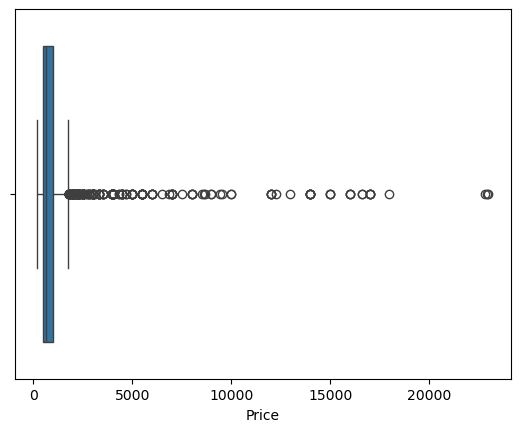

In [425]:
sns.boxplot(x=df['Price'])  # check extreme values

In [426]:
df = df[df['Price'] < 6000]



FEATURE SELECTION


In [427]:
#df = df.drop(columns=['Product Link', 'Product Name'])


In [428]:
import pandas as pd

def extract_product_name(url):
    """Extract product name while preserving product codes"""
    try:
        # First partition - get everything after 'flipkart.com/'
        after_domain = url.partition('flipkart.com/')[2]
        
        # Second partition - get everything before '/p/'
        product_part = after_domain.partition('/p/')[0]
        
        # Clean the name while preserving product codes
        clean_name = (
            product_part
            .replace('-', ' ')      # Replace hyphens with spaces
            .title()               # Title case
            .strip()               # Remove whitespace
        )
        
        return clean_name if clean_name else None
    except:
        return None

# Test with your URL
url = "https://www.flipkart.com/aroma-nb119-titanium-48-hours-playtime-neckband-bluetooth/p/itmbc3742b6dd62c?pid=ACCGDSSU8BNHKN8G"
print(extract_product_name(url))
# Output: "Aroma Nb119 Titanium 48 Hours Playtime Neckband Bluetooth"


# Extract clean product names
df['Full Product Name'] = df['Product Link'].apply(extract_product_name)

# For any failed extractions, use the original name (cleaned)
df['Full Product Name'] = df['Full Product Name'].fillna(
    df['Product Name'].str.replace(r'\.\.\..*$', '', regex=True).str.strip()
)

df.drop(columns=['Product Name'], inplace=True)
df.rename(columns={'Full Product Name': 'Product Name'}, inplace=True)


Aroma Nb119 Titanium 48 Hours Playtime Neckband Bluetooth


In [429]:
def categorize_product(name):
    name = str(name).lower()
    
    if any(kw in name for kw in ["airdopes", "buds", "tws", "true wireless", "duopods", "earbuds", "pod", "pods"]):
        return "Earbuds"
    elif any(kw in name for kw in ["neckband", "nb", "band", "collar"]):
        return "Neckband"
    elif any(kw in name for kw in ["headphone", "rockerz", "over-ear", "on-ear", "headset"]):
        return "Over-Ear/On-Ear"
    elif any(kw in name for kw in ["gaming", "gamer", "beast mode", "rage mode", "kraken"]):
        return "Gaming Headset"
    elif any(kw in name for kw in ["sports", "running", "workout", "sweatproof", "ipx"]):
        return "Sports Earphones"
    elif any(kw in name for kw in ["anc", "active noise cancellation", "noise cancelling"]):
        return "ANC Earphones"
    elif any(kw in name for kw in ["air conduction", "open ear"]):
        return "Air Conduction"
    else:
        return "Other"

# Apply categorization
df['Product Type'] = df['Product Name'].apply(categorize_product)

# For better analysis, you might want to add:
print(df['Product Type'].value_counts())

Product Type
Earbuds             1498
Neckband             866
Gaming Headset       471
Other                467
Over-Ear/On-Ear      428
ANC Earphones         28
Sports Earphones      13
Name: count, dtype: int64


In [430]:
# Step 1: Define Premium Brands and Price Thresholds
premium_brands = {
    'Sony', 'Bose', 'Apple', 'Beats',  'JBL', 
    'Jabra', 'Bowers & Wilkins', 'Marshall', 'Bang & Olufsen'
}

semi_premium_brands = {
    'OnePlus', 'Nothing', 'Realme', 'Oppo', 'Xiaomi', 'Samsung',
    'Boat', 'Noise', 'Boult', 'pTron', 'Mivi', 'Zebronics'
}

# Step 2: Create Premium Classification Function
def classify_premium(row):
    brand = str(row['Brand']).strip()
    price = float(row['Price'])
    product_type = row['Product Type']
    
    # Premium brands are always premium regardless of price
    if brand in premium_brands:
        return "Premium"
    
    # Semi-premium brands only if price exceeds threshold
    elif brand in semi_premium_brands:
        # Different price thresholds for different product types
        if product_type == "Over-Ear/On-Ear" and price > 3000:
            return "Premium"
        elif product_type in ["Earbuds", "ANC Earphones"] and price > 2000:
            return "Premium"
        elif product_type == "Neckband" and price > 1500:
            return "Premium"
        else:
            return "Standard"
    
    # Non-listed brands with exceptionally high prices
    elif price > 5000:  # For unknown brands with premium pricing
        return "Premium"
    
    else:
        return "Standard"

# Step 3: Apply Premium Classification
df['Premium_Tier'] = df.apply(classify_premium, axis=1)

# Step 4: Create Combined Category
df['Product_Category'] = df.apply(
    lambda x: f"{x['Premium_Tier']} {x['Product Type']}", 
    axis=1
)

# Step 5: Analysis
print("\nPremium Distribution:")
print(df['Premium_Tier'].value_counts())



Premium Distribution:
Premium_Tier
Standard    3688
Premium       83
Name: count, dtype: int64


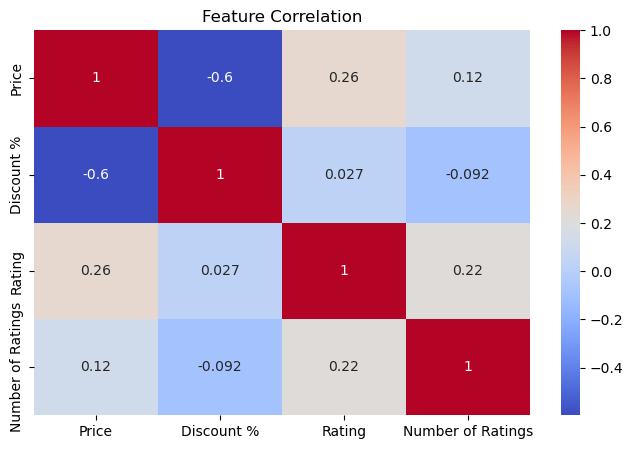

In [431]:
import matplotlib.pyplot as plt

# Correlation matrix
corr = df[['Price',  'Discount %', 'Rating', 'Number of Ratings']].corr()

# Heatmap
plt.figure(figsize=(8, 5))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Feature Correlation")
plt.show()


In [432]:
df['Value for Money'] = df['Rating'] / df['Price']


In [433]:
df['Rating Category'] = pd.cut(df['Rating'], bins=[0, 2.5, 3.5, 4.5, 5], labels=['Low', 'Medium', 'High', 'Very High'])


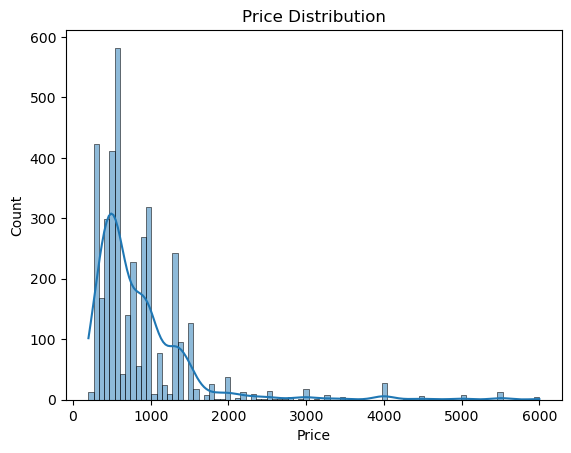

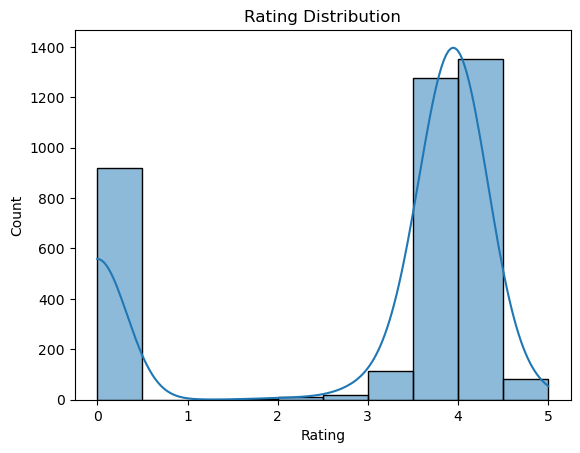

In [434]:
import seaborn as sns
import matplotlib.pyplot as plt

# Price distribution
sns.histplot(df['Price'], kde=True)
plt.title("Price Distribution")
plt.show()

# Rating distribution
sns.histplot(df['Rating'], bins=10, kde=True)
plt.title("Rating Distribution")
plt.show()


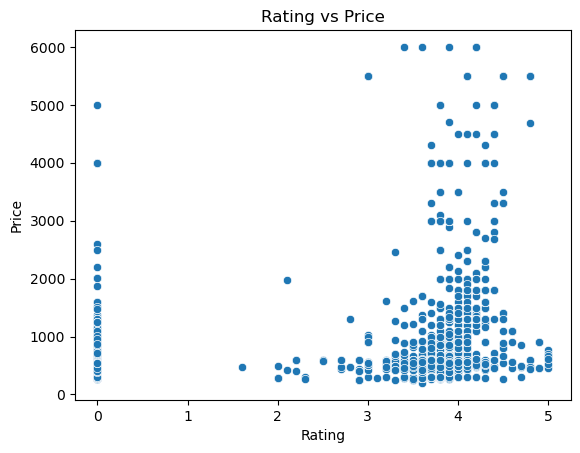

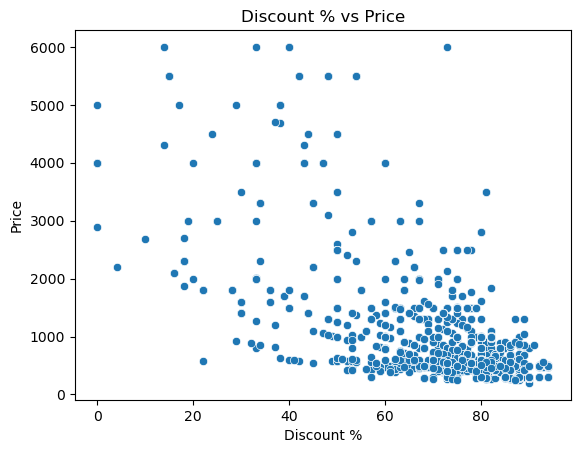

In [435]:
# Price vs Rating
sns.scatterplot(x='Rating', y='Price', data=df)
plt.title("Rating vs Price")
plt.show()

# Price vs Discount
sns.scatterplot(x='Discount %', y='Price', data=df)
plt.title("Discount % vs Price")
plt.show()


**Exploratory Data Analysis (EDA)**

1. Top Brands by Count & Popularity

Frequency count of each brand

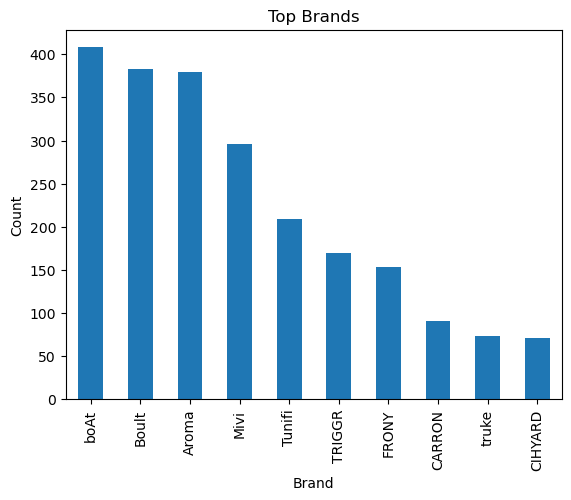

In [436]:
df['Brand'].value_counts().head(10).plot(kind='bar', title='Top Brands')
plt.ylabel("Count")
plt.show()


Average Price by Brand

C:\Users\sanyam mahajan\AppData\Local\Temp\ipykernel_18884\3396669419.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  brand_price = df.groupby('Brand')['Price'].mean().sort_values(ascending=False).head(20)


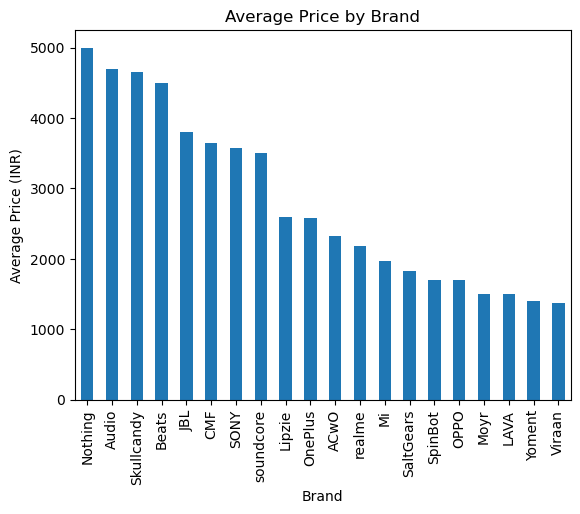

In [437]:
brand_price = df.groupby('Brand')['Price'].mean().sort_values(ascending=False).head(20)
brand_price.plot(kind='bar', title='Average Price by Brand')
plt.ylabel("Average Price (INR)")
plt.show()


Total number of ratings per brand

C:\Users\sanyam mahajan\AppData\Local\Temp\ipykernel_18884\3072815626.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  total_ratings_per_brand = df.groupby('Brand')['Number of Ratings'].sum().sort_values(ascending=False)


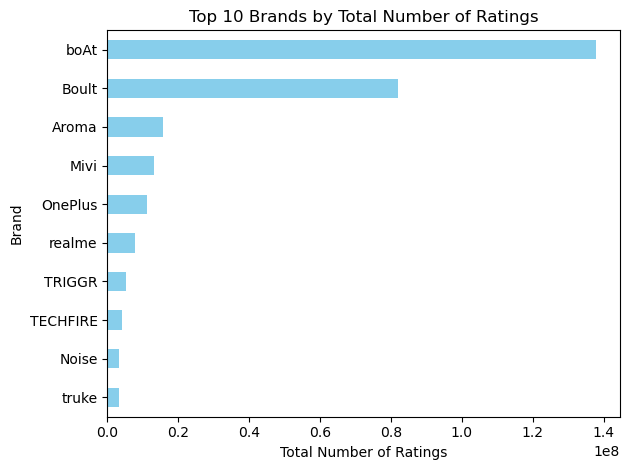

In [438]:

# Group by brand and sum the number of ratings
total_ratings_per_brand = df.groupby('Brand')['Number of Ratings'].sum().sort_values(ascending=False)

# Plot top 10 brands by number of ratings
total_ratings_per_brand.head(10).plot(kind='barh', color='skyblue')
plt.xlabel("Total Number of Ratings")
plt.ylabel("Brand")
plt.title("Top 10 Brands by Total Number of Ratings")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()



2. Price Distribution

Overall price distribution

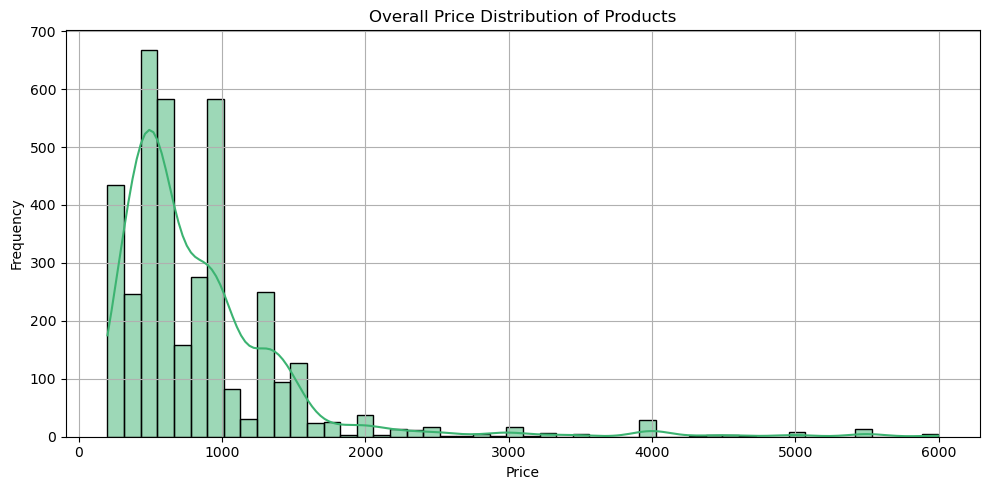

In [439]:

# Histogram with KDE (Kernel Density Estimation)
plt.figure(figsize=(10, 5))
sns.histplot(df['Price'], bins=50, kde=True, color='mediumseagreen')
plt.title('Overall Price Distribution of Products')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.grid(True)
plt.tight_layout()
plt.show()


 Price vs Rating: Do expensive products get better ratings?

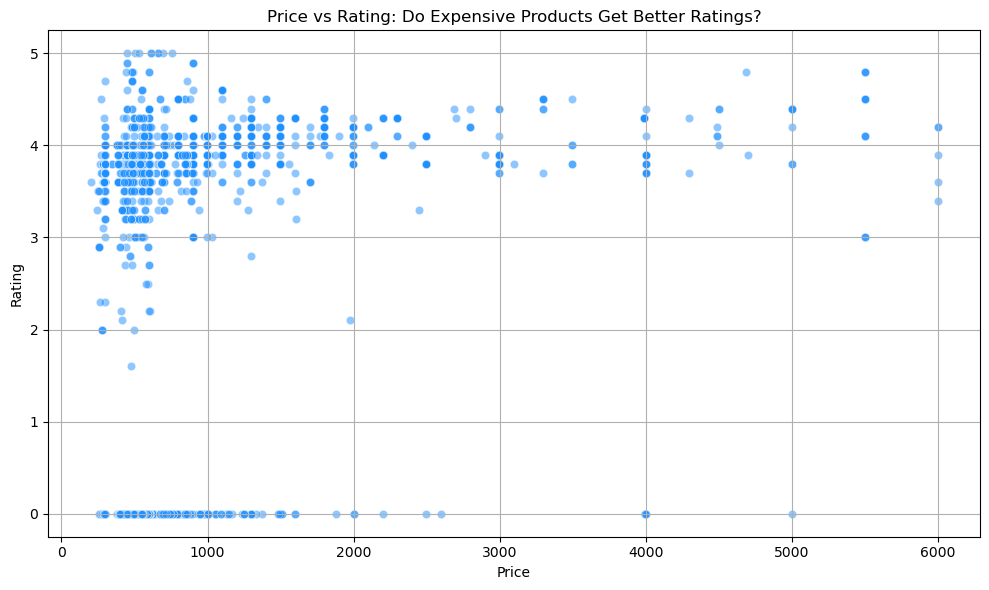

In [440]:


plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Price', y='Rating', alpha=0.5, color='dodgerblue')
plt.title('Price vs Rating: Do Expensive Products Get Better Ratings?')
plt.xlabel('Price')
plt.ylabel('Rating')
plt.grid(True)
plt.tight_layout()
plt.show()


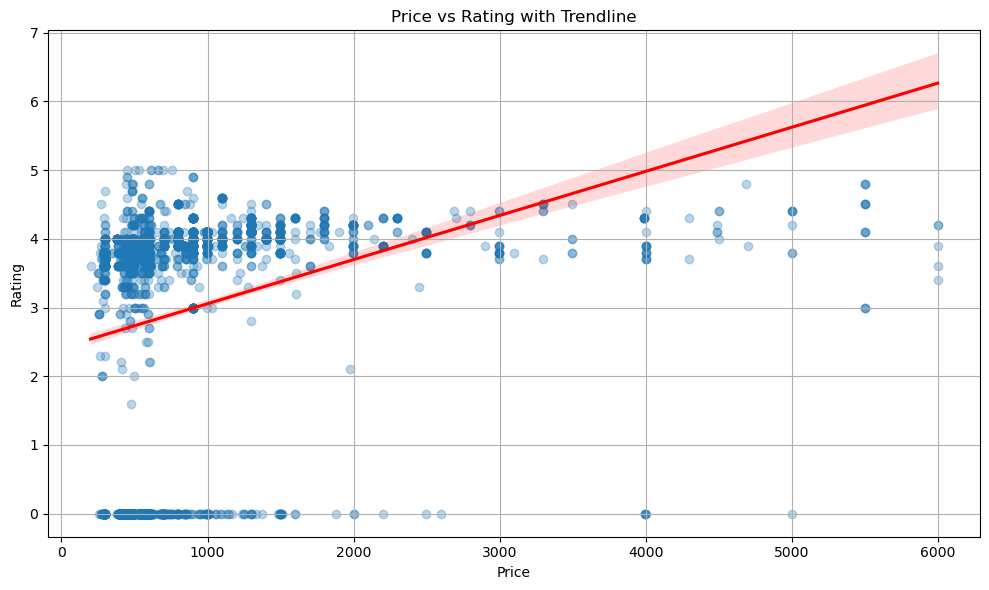

In [441]:
plt.figure(figsize=(10, 6))
sns.regplot(data=df, x='Price', y='Rating', scatter_kws={'alpha':0.3}, line_kws={'color': 'red'})
plt.title('Price vs Rating with Trendline')
plt.xlabel('Price')
plt.ylabel('Rating')
plt.grid(True)
plt.tight_layout()
plt.show()


In [442]:
correlation = df['Price'].corr(df['Rating'])
print(f"Pearson Correlation between Price and Rating: {correlation:.4f}")


Pearson Correlation between Price and Rating: 0.2611


Price Range
<500      2.465875
500–1k    2.917340
1k–2k     3.834121
2k–4k     3.681982
4k–6k     4.008333
Name: Rating, dtype: float64


C:\Users\sanyam mahajan\AppData\Local\Temp\ipykernel_18884\4178647327.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_rating_by_price_range = df.groupby('Price Range')['Rating'].mean()


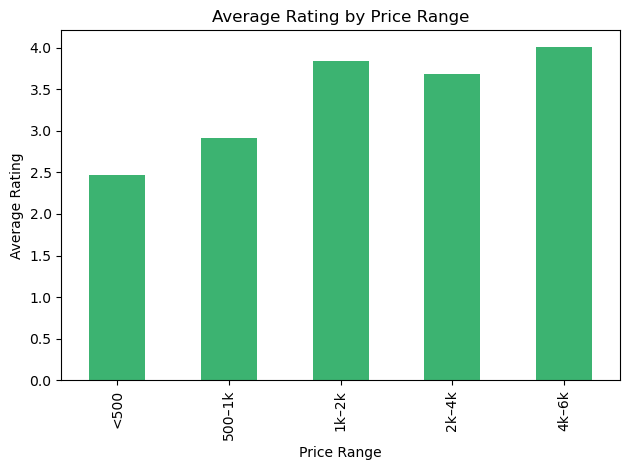

In [443]:
df['Price Range'] = pd.cut(df['Price'], bins=[0, 500, 1000, 2000, 4000, 6000], 
                           labels=['<500', '500–1k', '1k–2k', '2k–4k', '4k–6k'])

avg_rating_by_price_range = df.groupby('Price Range')['Rating'].mean()

print(avg_rating_by_price_range)

avg_rating_by_price_range.plot(kind='bar', color='mediumseagreen')
plt.title('Average Rating by Price Range')
plt.ylabel('Average Rating')
plt.xlabel('Price Range')
plt.tight_layout()
plt.show()


Price distribution across brands/product types

C:\Users\sanyam mahajan\AppData\Local\Temp\ipykernel_18884\571017053.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Product Type', y='Price', palette='coolwarm')


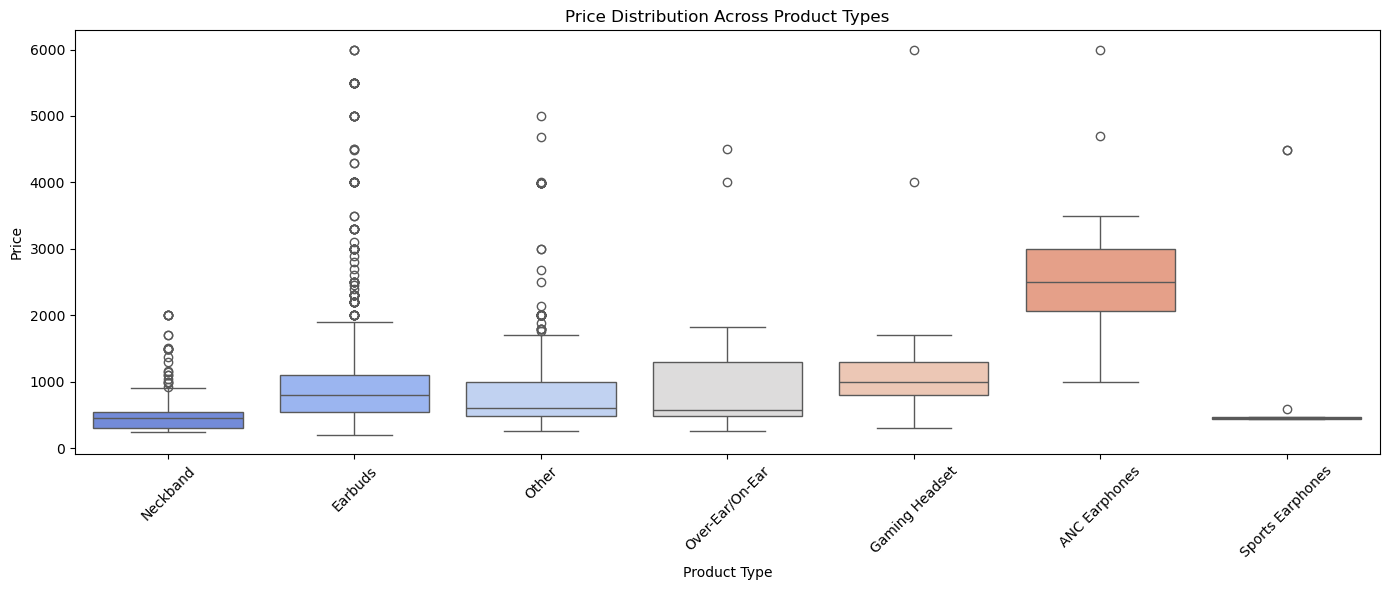

In [444]:
plt.figure(figsize=(14, 6))
sns.boxplot(data=df, x='Product Type', y='Price', palette='coolwarm')
plt.title('Price Distribution Across Product Types')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


3. Discount Analysis

Avg. discount per brand.

In [445]:
avg_discount_per_brand = df.groupby('Brand')['Discount %'].mean().sort_values(ascending=False)

print(avg_discount_per_brand)


Brand
HOUSE             94.0
TECHFIRE     90.382353
BULLSTORM         90.0
Earboss           89.0
Orionis           89.0
               ...    
CMF               23.5
OnePlus      20.935484
Apple             <NA>
Brand             <NA>
Huawei            <NA>
Name: Discount %, Length: 193, dtype: Float64


C:\Users\sanyam mahajan\AppData\Local\Temp\ipykernel_18884\1056976818.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_discount_per_brand = df.groupby('Brand')['Discount %'].mean().sort_values(ascending=False)


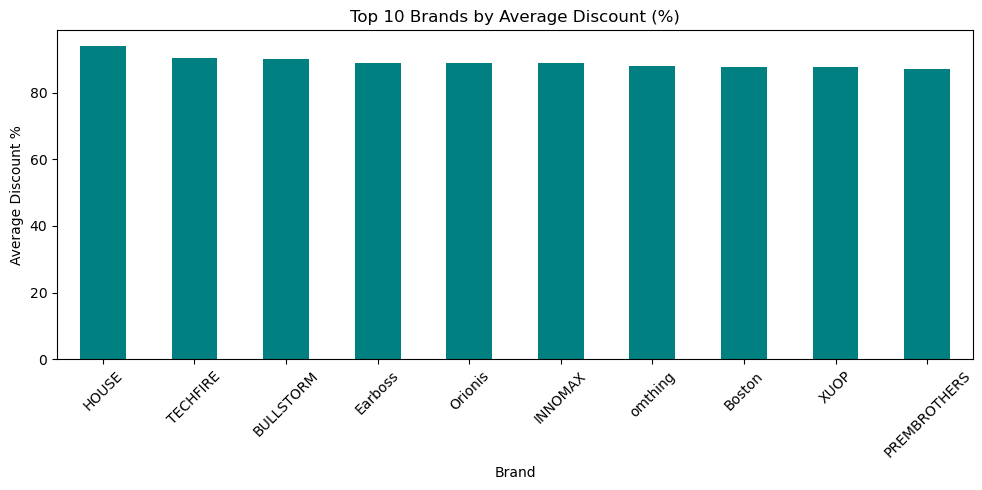

In [446]:
import matplotlib.pyplot as plt

avg_discount_per_brand.head(10).plot(kind='bar', color='teal', figsize=(10, 5))
plt.title('Top 10 Brands by Average Discount (%)')
plt.xlabel('Brand')
plt.ylabel('Average Discount %')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Correlation between discount % and number of ratings

In [447]:
correlation = df['Discount %'].corr(df['Number of Ratings'])
print(f"Correlation between Discount % and Number of Ratings: {correlation:.3f}")


Correlation between Discount % and Number of Ratings: -0.092


Rating Distribution

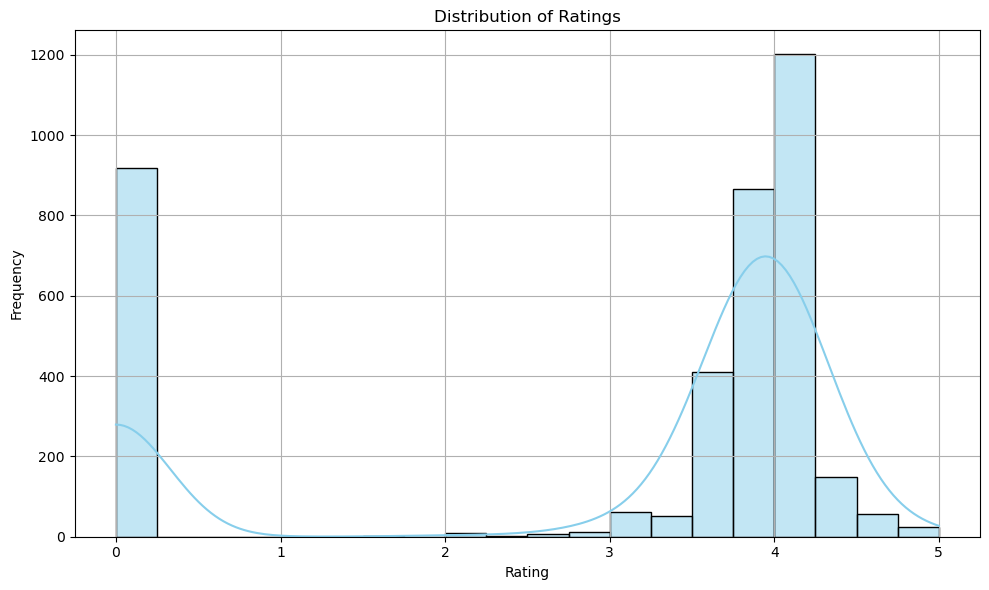

In [448]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Rating'], bins=20, kde=True, color='skyblue')
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.grid(True)
plt.tight_layout()
plt.show()


In [449]:
# Assuming your DataFrame is already defined as 'df'

# Group by 'Brand' and calculate the average 'Rating'
brand_ratings = df.groupby('Brand')['Rating'].mean().reset_index()

# Display the result
print(brand_ratings)


         Brand    Rating
0       4uonly  0.000000
1         AAMS  3.900000
2         ACwO  2.000000
3       ARFIRE  0.000000
4      Alchiko  0.680000
..         ...       ...
188  soundcore  4.500000
189      truke  4.121622
190    ultiads  1.150000
191      wazny  2.400000
192    xerovex  1.000000

[193 rows x 2 columns]


C:\Users\sanyam mahajan\AppData\Local\Temp\ipykernel_18884\1938979082.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  brand_ratings = df.groupby('Brand')['Rating'].mean().reset_index()


In [450]:
# Group by 'Brand' and calculate the average 'Rating'
brand_ratings = df.groupby('Brand')['Rating'].mean().reset_index()

# Sort the result by 'Rating' in descending order and get the top 10 brands
top_10_brands = brand_ratings.sort_values(by='Rating', ascending=False).head(10)

# Display the result
print(top_10_brands)


         Brand    Rating
7        Audio  4.800000
188  soundcore  4.500000
178       bAot  4.400000
95          Nu  4.400000
99        OPPO  4.300000
169   ZPELDORN  4.300000
119     Rackit  4.200000
26         CMF  4.200000
183     realme  4.167213
136    SpinBot  4.150000


C:\Users\sanyam mahajan\AppData\Local\Temp\ipykernel_18884\3936110509.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  brand_ratings = df.groupby('Brand')['Rating'].mean().reset_index()


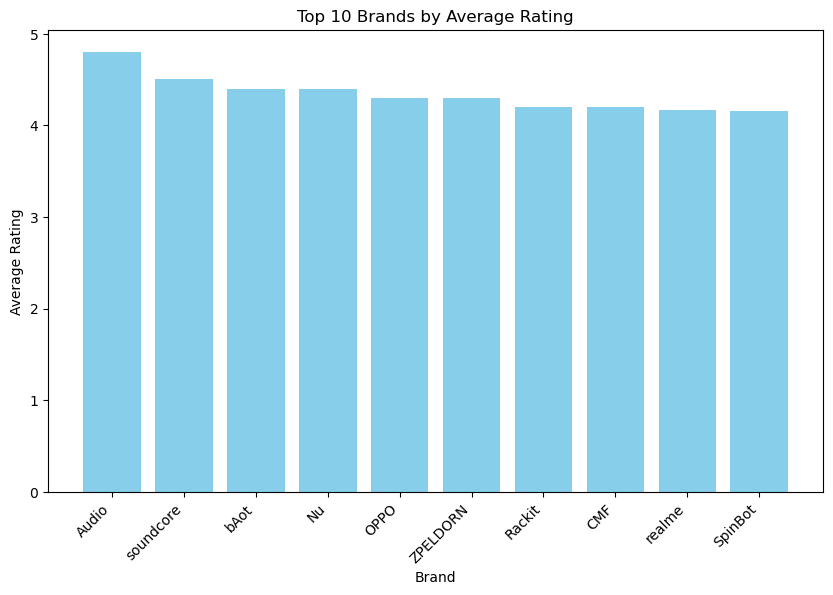

In [451]:
import matplotlib.pyplot as plt

# Plotting the bar chart
plt.figure(figsize=(10,6))
plt.bar(top_10_brands['Brand'], top_10_brands['Rating'], color='skyblue')
plt.xlabel('Brand')
plt.ylabel('Average Rating')
plt.title('Top 10 Brands by Average Rating')
plt.xticks(rotation=45, ha='right')
plt.show()


High Performing Products

Filter products with:
     - Rating ≥ 4.2

In [452]:
# Filter products with Rating ≥ 4.2, Number of Ratings > 1000, and Discount % > 20
filtered_df = df[(df['Rating'] >= 4.2) & 
                 (df['Number of Ratings'] > 1000) & 
                 (df['Discount %'] > 50)]

# Display the filtered result
print(filtered_df)


       Brand  Price  Original Price  Discount %  Rating  Number of Ratings  \
7     realme   1099            2499          56     4.2             461206   
8     realme   1099            2499          56     4.2             461206   
19    realme   1099            2499          56     4.2             461206   
49      boAt   1299            3990          67     4.2             482401   
59      boAt   1499            3990          62     4.3             385709   
...      ...    ...             ...         ...     ...                ...   
3648    boAt   1299            3990          67     4.2             482669   
3692    boAt   1299            3990          67     4.2             482669   
3727    boAt   1299            3990          67     4.2             482669   
3767    boAt   1299            3990          67     4.2             482669   
3820    boAt   1299            3990          67     4.2             482669   

                                           Product Link  Discou

In [453]:
len(filtered_df)

147

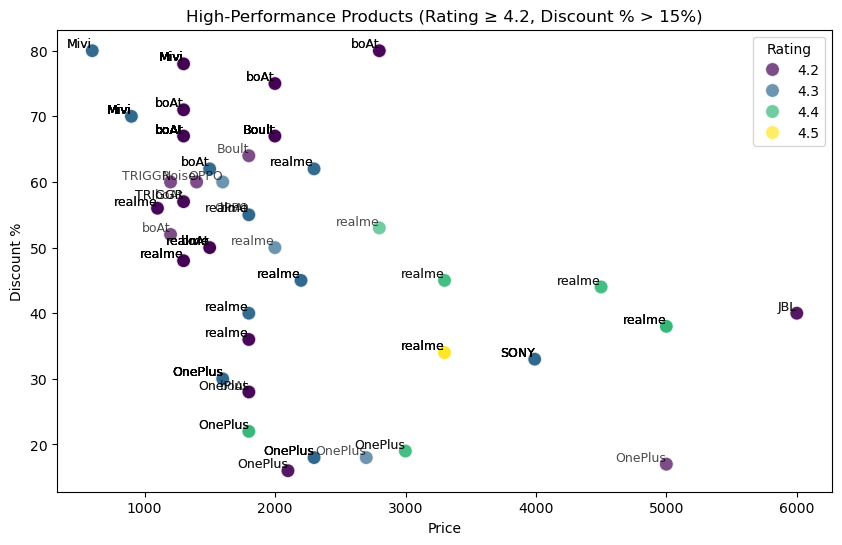

In [454]:
# Filter for high-performing products
high_perf_products = df[(df['Rating'] >= 4.2) & 
                         (df['Number of Ratings'] > 1000) & 
                         (df['Discount %'] > 15)]  # Example discount threshold of 15%

# Visualize the distribution
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Price', y='Discount %', hue='Rating', palette='viridis', data=high_perf_products, s=100, alpha=0.7)

# Annotate each point with the Brand name
for i in range(high_perf_products.shape[0]):
    plt.text(high_perf_products['Price'].iloc[i], 
             high_perf_products['Discount %'].iloc[i], 
             high_perf_products['Brand'].iloc[i], 
             fontsize=9, ha='right', va='bottom', alpha=0.7)

plt.title('High-Performance Products (Rating ≥ 4.2, Discount % > 15%)')
plt.xlabel('Price')
plt.ylabel('Discount %')
plt.legend(title='Rating')
plt.show()


In [455]:
df.columns

Index(['Brand', 'Price', 'Original Price', 'Discount %', 'Rating',
       'Number of Ratings', 'Product Link', 'Discount Amount', 'Product Name',
       'Product Type', 'Premium_Tier', 'Product_Category', 'Value for Money',
       'Rating Category', 'Price Range'],
      dtype='object')

In [456]:
df.head()

,Brand,Price,Original Price,Discount %,Rating,Number of Ratings,Product Link,Discount Amount,Product Name,Product Type,Premium_Tier,Product_Category,Value for Money,Rating Category,Price Range
0,Aroma,299,2999,90,3.7,41388,https://www.flipkart.com/aroma-nb120-amaze-upt...,2700,Aroma Nb120 Amaze Upto 50 Hours Playtime Fast ...,Neckband,Standard,Standard Neckband,0.012375,High,<500
1,Aroma,299,1499,80,3.8,9478,https://www.flipkart.com/aroma-nb121-almaty-up...,1200,Aroma Nb121 Almaty Upto 40H Playtime Fast Char...,Earbuds,Standard,Standard Earbuds,0.012709,High,<500
2,Aroma,378,2499,85,4.0,298135,https://www.flipkart.com/aroma-nb119-titanium-...,2121,Aroma Nb119 Titanium 48 Hours Playtime Neckban...,Neckband,Standard,Standard Neckband,0.010582,High,<500
3,OnePlus,1599,2299,30,4.3,1208320,https://www.flipkart.com/oneplus-bullets-wirel...,700,Oneplus Bullets Wireless Z2 Bluetooth,Other,Standard,Standard Other,0.002689,High,1k–2k
4,Aroma,469,2999,84,3.9,6341,https://www.flipkart.com/aroma-nb126-aster-v5-...,2530,Aroma Nb126 Aster V5 4 Upto 50Hr Playtime 45Ms...,Earbuds,Standard,Standard Earbuds,0.008316,High,<500


In [457]:
df.to_csv("data_eda.csv", index=True)